In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
df = pd.read_csv("DataFiles/iris_unsupervised_learning.csv", header=None, names=['SL','SW','PL','PW','class'])

In [3]:
df.sample(7)

,SL,SW,PL,PW,class
49,5.0,3.3,1.4,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
69,5.6,2.5,3.9,1.1,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
72,6.3,2.5,4.9,1.5,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
147,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
df['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [5]:
df2 = df.loc[:, 'SL':'PW']

In [6]:
df2.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


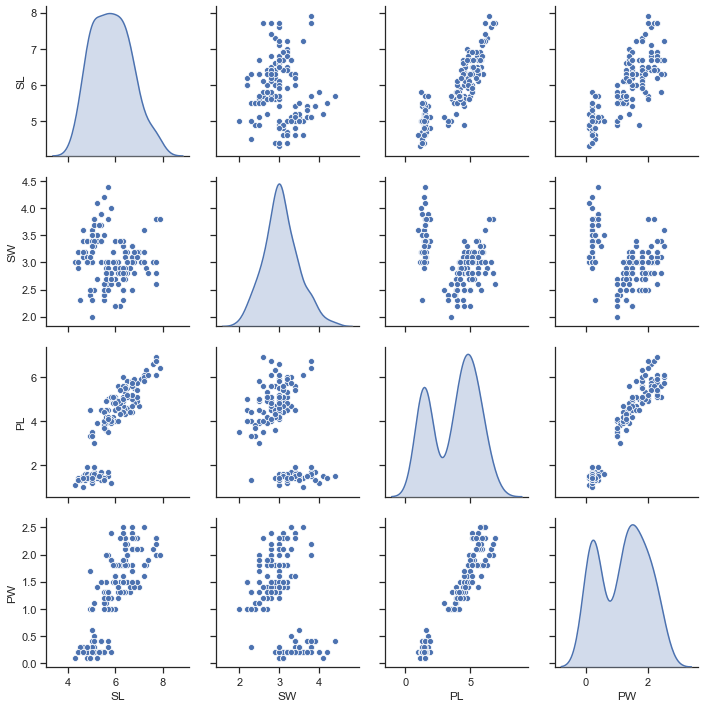

In [7]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

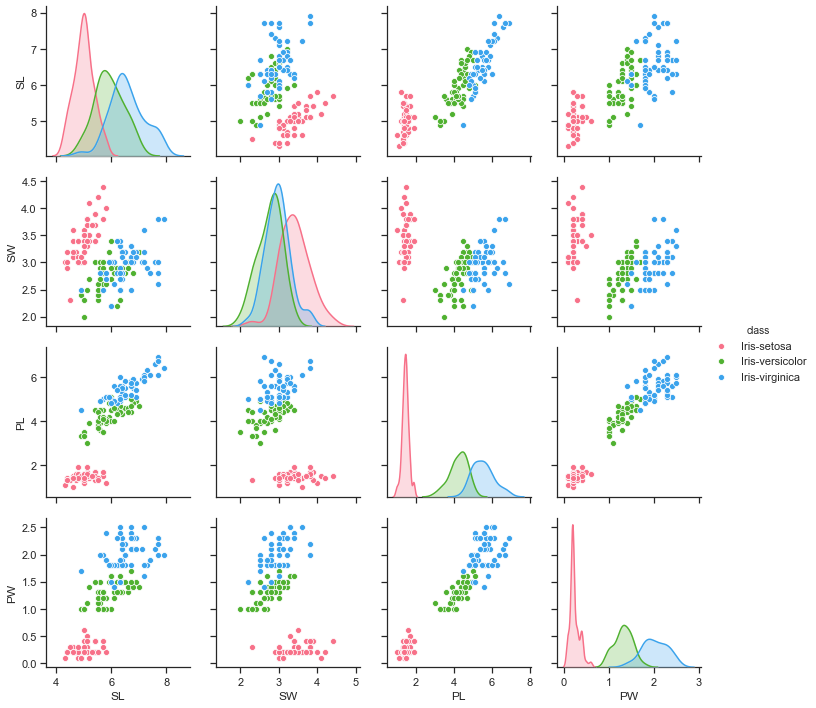

In [8]:
sns.pairplot(df, vars = ['SL', 'SW', 'PL', 'PW'] ,hue='class', palette='husl')
plt.show()

In [9]:
g_seto=df[df['class']=='Iris-setosa']
g_seto.describe()

,SL,SW,PL,PW
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [10]:
g_vc=df[df['class']=='Iris-versicolor']
g_vc.describe()

,SL,SW,PL,PW
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [11]:
g_vg=df[df['class']=='Iris-virginica']
g_vg.describe()

,SL,SW,PL,PW
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


C:\Users\Alok\Softwares\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


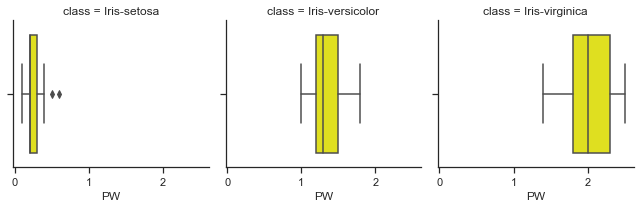

In [12]:
a = sns.FacetGrid(df, col='class')
a.map(sns.boxplot, 'PW', color='yellow')

C:\Users\Alok\Softwares\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


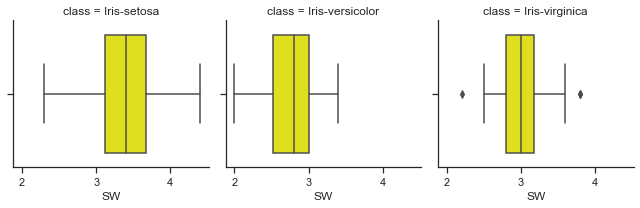

In [13]:
a = sns.FacetGrid(df, col='class')
a.map(sns.boxplot, 'SW', color='yellow')

C:\Users\Alok\Softwares\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


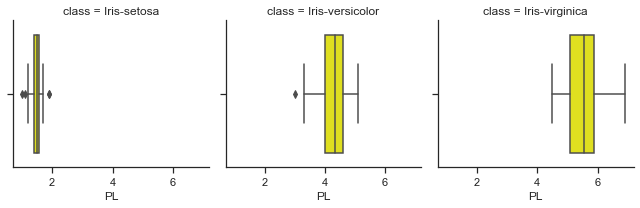

In [14]:
a = sns.FacetGrid(df, col='class')
a.map(sns.boxplot, 'PL', color='yellow')

In [15]:
df_scaled = df2.apply(zscore)


In [16]:
df_scaled.head()

,SL,SW,PL,PW
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [17]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.615507
4,5,91.111019
5,6,80.166277
6,7,71.986145
7,8,62.641008
8,9,54.343737
9,10,47.572395


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

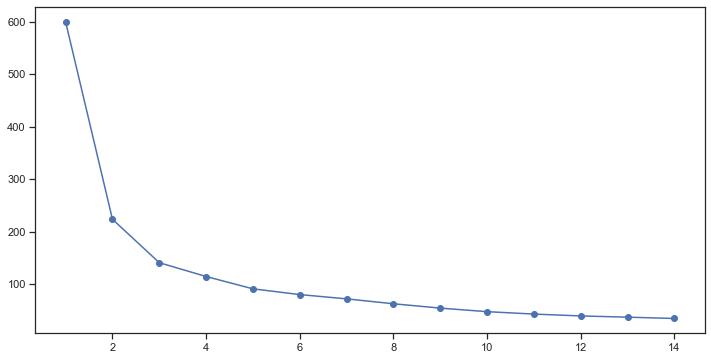

In [18]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [19]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [20]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [21]:
centroids=kmeans.cluster_centers_

In [22]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,SL,SW,PL,PW
0,-0.050220,-0.880292,0.347532,0.282063
1,-1.014579,0.842307,-1.304878,-1.255129
2,1.135970,0.096598,0.996271,1.017172


In [23]:
# Add labels generated by KMeans 
df_scaled['class']=kmeans.labels_

In [24]:
c0=centroids[0,:]
c0

array([-0.05021989, -0.88029181,  0.34753171,  0.28206327])

In [25]:
g0=df_scaled[df_scaled['class']==0]
g0.head()

,SL,SW,PL,PW,class
53,-0.416010,-1.744778,0.137236,0.133226,0
54,0.795669,-0.587764,0.478430,0.396172,0
55,-0.173674,-0.587764,0.421564,0.133226,0
57,-1.143017,-1.513375,-0.260824,-0.261193,0
58,0.916837,-0.356361,0.478430,0.133226,0


kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [26]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [27]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [28]:
iris_df_labeled['labels'].value_counts()

0    53
1    50
2    47
Name: labels, dtype: int64

In [29]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

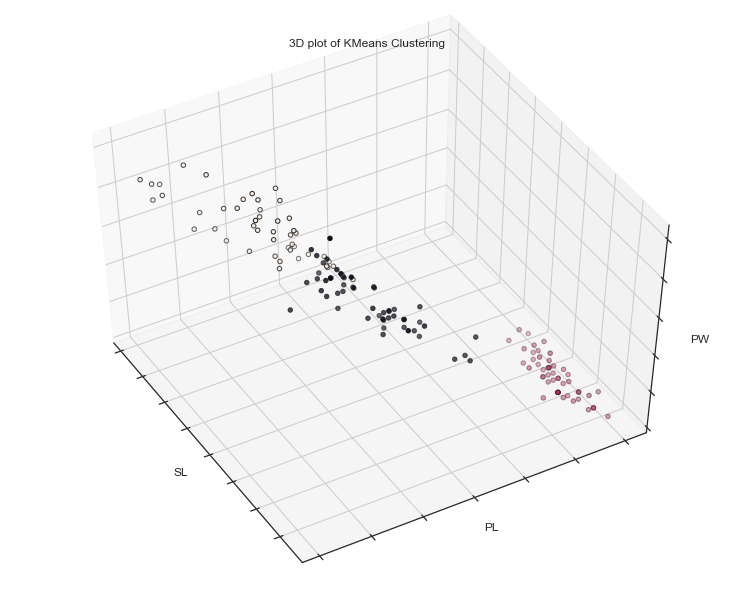

In [33]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=150)
#kmeans.fit(df_scaled)
L = kmeans.labels_
ax.scatter(df2.iloc[:, 0], df2.iloc[:, 2], df2.iloc[:, 3],
           c=L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SL')
ax.set_ylabel('PL')
ax.set_zlabel('PW')
ax.set_title('3D plot of KMeans Clustering')


In [34]:
iris_clusters = iris_df_labeled.groupby(['labels'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)


In [35]:
df0.shape,df1.shape,df2.shape

((53, 6), (50, 6), (47, 6))

In [41]:
df0.head()

,SL,SW,PL,PW,class,labels
53,-0.416010,-1.744778,0.137236,0.133226,0,0
54,0.795669,-0.587764,0.478430,0.396172,0,0
55,-0.173674,-0.587764,0.421564,0.133226,0,0
57,-1.143017,-1.513375,-0.260824,-0.261193,0,0
58,0.916837,-0.356361,0.478430,0.133226,0,0


In [42]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [43]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [44]:
tot_I=I0+I1+I2
print(tot_I)

[ 661.73093684 1293.1122716   822.69146246  786.0410939 ]


In [0]:
#Linkage based euclidean distance updation calculation

from scipy.spatial.distance import cdist
D=np.array([[4,11.6],[8.2,7.9],[3.4,4.1],[7.8,20.2],[3.9,8.2],[9.2,8.1],[4.1,2.1]])
dist=cdist(D,D)
print(dist)

[[ 0.          5.59732079  7.52396172  9.40212742  3.40147027  6.26817358
   9.5005263 ]
 [ 5.59732079  0.          6.12209115 12.30650235  4.31045241  1.0198039
   7.10281634]
 [ 7.52396172  6.12209115  0.         16.69041641  4.13037529  7.04556598
   2.11896201]
 [ 9.40212742 12.30650235 16.69041641  0.         12.61784451 12.18072247
  18.47430648]
 [ 3.40147027  4.31045241  4.13037529 12.61784451  0.          5.30094331
   6.10327781]
 [ 6.26817358  1.0198039   7.04556598 12.18072247  5.30094331  0.
   7.87464285]
 [ 9.5005263   7.10281634  2.11896201 18.47430648  6.10327781  7.87464285
   0.        ]]


In [45]:
kmeans.inertia_

140.96581663074699

In [46]:
from sklearn import metrics

In [ ]:
metrics.silhouette_score

In [0]:
from sklearn.cluster import AgglomerativeClustering 

In [0]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [0]:
model2.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [0]:
df_AGC=df_scaled.copy(deep=True)

In [0]:
df_AGC['labels']=model2.labels_

In [0]:
AGC_0=df_AGC[df_AGC['labels']==0]
AGC_0.shape

(71, 5)

In [0]:
AGC_1=df_AGC[df_AGC['labels']==1]
AGC_1.shape

(49, 5)

In [0]:
AGC_2=df_AGC[df_AGC['labels']==2]
AGC_2.shape

(30, 5)

In [0]:
#Centroids Calculation
C0=np.array(np.mean(AGC_0.iloc[:,:-1]))    #Verginica group
C1=np.array(np.mean(AGC_1.iloc[:,:-1]))   #Setosa group
C2=np.array(np.mean(AGC_2.iloc[:,:-1]))   #VSC group

In [0]:
C0

array([ 0.85198648, -0.14125358,  0.85806877,  0.86280834])

In [0]:
C1

array([-1.00206653,  0.89510445, -1.30297509, -1.25663117])

In [0]:
C2

array([-0.37965933, -1.12770378,  0.09742991,  0.01051784])

In [0]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(AGC_0.shape[0]):
  AGC_I0=AGC_I0+np.sum((AGC_0.iloc[i,:-1]-C0)**2)
for i in np.arange(AGC_1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((AGC_1.iloc[i,:-1]-C1)**2)
for i in np.arange(AGC_2.shape[0]):
  AGC_I2=AGC_I2+np.sum((AGC_2.iloc[i,:-1]-C2)**2)

In [0]:
AGC_tot_I=AGC_I0+AGC_I1+AGC_I2
AGC_tot_I

150.1223254726958

Text(0.5, 0.92, '3D plot of AGC Clustering')

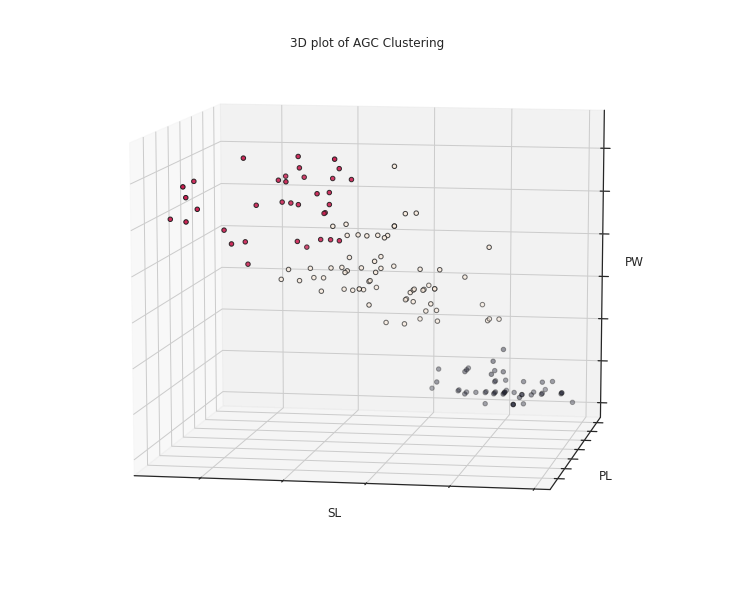

In [0]:
#Results of AGC
#3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=100)
L = model2.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 2], df_scaled.iloc[:, 3],
           c=L.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('SL')
ax.set_ylabel('PL')
ax.set_zlabel('PW')
ax.set_title('3D plot of AGC Clustering')


In [0]:
## creating a new dataframe only for labels and converting it into categorical variable
AGC_labels = pd.DataFrame(model2.labels_ , columns = list(['labels']))

AGC_labels['labels'] = AGC_labels['labels'].astype('category')

In [0]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_AGC_labeled = df_scaled.join(AGC_labels)

In [0]:
AGC_clusters = iris_AGC_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)
Df2=AGC_clusters.get_group(2)

In [0]:
(Df0.shape,Df1.shape,Df2.shape)

((71, 5), (49, 5), (30, 5))

In [0]:
C0=np.array([Df0['SL'].mean(),Df0['SW'].mean(),Df0['PL'].mean(),Df0['PW'].mean()])
C1=np.array([Df1['SL'].mean(),Df1['SW'].mean(),Df1['PL'].mean(),Df1['PW'].mean()])
C2=np.array([Df2['SL'].mean(),Df2['SW'].mean(),Df2['PL'].mean(),Df2['PW'].mean()])


In [0]:
C0

array([ 0.85198648, -0.14125358,  0.85806877,  0.86280834])

In [0]:
C1

array([-1.00206653,  0.89510445, -1.30297509, -1.25663117])

In [0]:
C2

array([-0.37965933, -1.12770378,  0.09742991,  0.01051784])

In [0]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)
for i in np.arange(Df2.shape[0]):
  AGC_I2=AGC_I2+np.sum((Df2.iloc[i,:-1]-C2)**2)

In [0]:
AGC_I0,AGC_I1,AGC_I2

(82.66545030423667, 41.25393855123929, 26.20293661721983)

In [0]:
AGC_I0+AGC_I1+AGC_I2

150.1223254726958

In [0]:
df_scaled.head()

,SL,SW,PL,PW
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [0]:
from scipy.spatial.distance import pdist

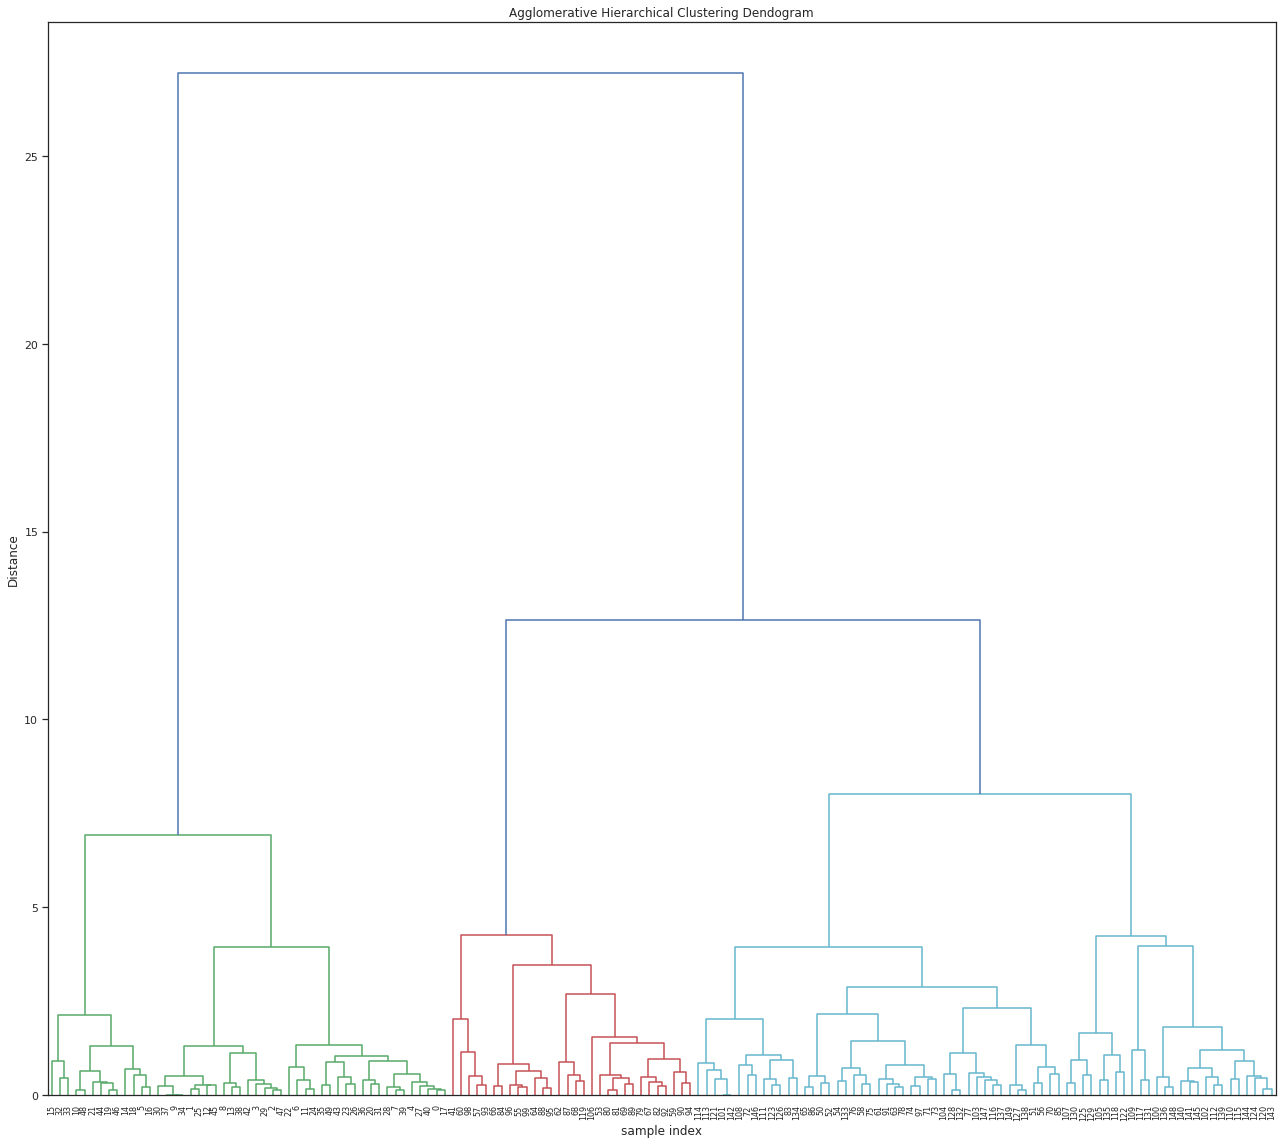

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,color_threshold=10,
           leaf_font_size=8)
plt.tight_layout()

In [0]:
df_AGC.loc[68]

SL        0.432165
SW       -1.976181
PL        0.421564
PW        0.396172
labels    2.000000
Name: 68, dtype: float64

In [0]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

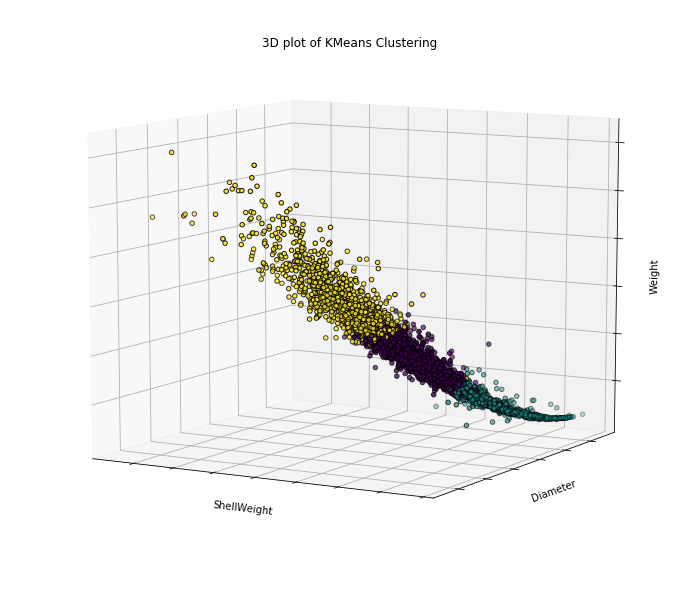

In [0]:
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=120)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 6], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],
           c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('ShellWeight')
ax.set_ylabel('Diameter')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')
